In [29]:
import pandas as pd

In [30]:
df = pd.read_csv('MSFT.csv')
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060980,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063158,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064247,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062613,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061524,47894400
...,...,...,...,...,...,...,...
9214,2022-10-03,235.410004,241.610001,234.660004,240.740005,240.740005,28880400
9215,2022-10-04,245.089996,250.360001,244.979996,248.880005,248.880005,34888400
9216,2022-10-05,245.990005,250.580002,244.100006,249.199997,249.199997,20347100
9217,2022-10-06,247.929993,250.339996,246.080002,246.789993,246.789993,20239900


In [31]:
df = df[['Date', 'Close']]

df


,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9214,2022-10-03,240.740005
9215,2022-10-04,248.880005
9216,2022-10-05,249.199997
9217,2022-10-06,246.789993


In [32]:
df['Date']


0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9214    2022-10-03
9215    2022-10-04
9216    2022-10-05
9217    2022-10-06
9218    2022-10-07
Name: Date, Length: 9219, dtype: object

In [33]:
import datetime


def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)


datetime_object = str_to_datetime('1986-03-19')
datetime_object


datetime.datetime(1986, 3, 19, 0, 0)

In [34]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']


C:\Users\hafid\AppData\Local\Temp/ipykernel_18284/1038773143.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9214   2022-10-03
9215   2022-10-04
9216   2022-10-05
9217   2022-10-06
9218   2022-10-07
Name: Date, Length: 9219, dtype: datetime64[ns]

In [35]:
df.index = df.pop('Date')
df


,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2022-10-03,240.740005
2022-10-04,248.880005
2022-10-05,249.199997


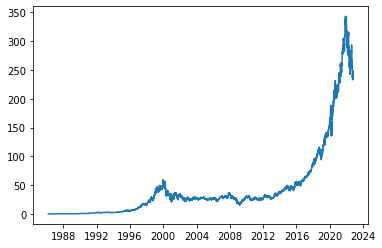

In [36]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])


In [37]:
import numpy as np


def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date +
                              datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(
        day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df


# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df


,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [38]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)


dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape


((252,), (252, 3, 1), (252,))

In [39]:
dates[0]

Timestamp('2021-03-25 00:00:00')

In [40]:
X[0]

array([[235.99],
       [237.58],
       [235.46]], dtype=float32)

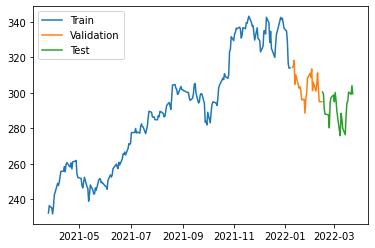

In [41]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])


c:\Users\hafid\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

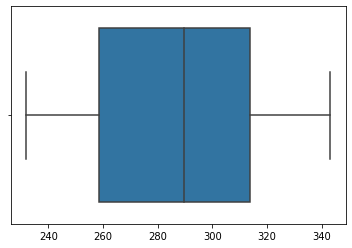

In [42]:
import seaborn as sns


sns.boxplot(y1)

In [43]:
import pandas as pd
po = pd.DataFrame(y1)
gas = po.describe().reset_index()

In [44]:
gas.to_excel('haha.xlsx')

PermissionError: [Errno 13] Permission denied: 'haha.xlsx'

In [ ]:
import plotly.graph_objects as go

x1 = dates_train
y1 = y_train
x2 = dates_val
y2 = y_val
x3 = dates_test
y3 = y_test

f1 = go.Figure(
    data=[
        go.Scatter(x=x1, y=y1, name="Current Data"),
        go.Scatter(x=x2, y=y2, name="Forecast Data"),
        # go.Scatter(x=x3, y=y3, name="third"),
    ],
    layout={"xaxis": {"title": "Date"}, "yaxis": {
        "title": "Pendaan(Rp)"}, "title": "Forecasting ITSG"}
)
f1


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)


Epoch 1/100
7/7 [==============================] - 3s 106ms/step - loss: 84959.2812 - mean_absolute_error: 289.7384 - val_loss: 92618.3203 - val_mean_absolute_error: 304.2455
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 84641.1875 - mean_absolute_error: 289.1889 - val_loss: 92284.3828 - val_mean_absolute_error: 303.6963
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 84336.8125 - mean_absolute_error: 288.6630 - val_loss: 91993.0234 - val_mean_absolute_error: 303.2162
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 84050.2578 - mean_absolute_error: 288.1659 - val_loss: 91643.6875 - val_mean_absolute_error: 302.6396
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 83684.0234 - mean_absolute_error: 287.5311 - val_loss: 91211.6562 - val_mean_absolute_error: 301.9250
Epoch 6/100
7/7 [==============================] - 0s 17ms/step - loss: 83260.9141 - mean_absolute_error: 286.7927 - val_loss: 90739

In [ ]:
model.history()

TypeError: 'History' object is not callable

In [ ]:
import plotly.graph_objects as go

x11 = dates_train
y11 = train_predictions
x22 = dates_train
y22 = y_train

f1 = go.Figure(
    data=[
        go.Scatter(x=x11, y=y11, name="training predictions"),
        go.Scatter(x=x22, y=y22, name="training observation"),
    ],
    layout={"xaxis": {"title": "Date"}, "yaxis": {
        "title": "Pengeluaran(Rp)"}, "title": "Forecasting ITSG"}
)
f1


NameError: name 'train_predictions' is not defined

7/7 [==============================] - 0s 1ms/step


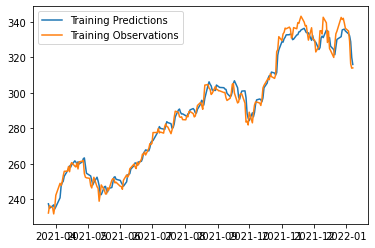

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])
